In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')
train.head(2)

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,1,0


In [3]:
train.describe()

,Block,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
count,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000
mean,35.687797,41.841139,-87.699908,7.819532,12.853512,0.052446
std,24.339468,0.112742,0.096514,1.452921,16.133816,0.222936
min,10.000000,41.644612,-87.930995,3.000000,1.000000,0.000000
25%,12.000000,41.732984,-87.760070,8.000000,2.000000,0.000000
50%,33.000000,41.846283,-87.694991,8.000000,5.000000,0.000000
75%,52.000000,41.954690,-87.627796,9.000000,17.000000,0.000000
max,98.000000,42.017430,-87.531635,9.000000,50.000000,1.000000


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10506 entries, 0 to 10505
Data columns (total 12 columns):
Date                      10506 non-null object
Address                   10506 non-null object
Species                   10506 non-null object
Block                     10506 non-null int64
Street                    10506 non-null object
Trap                      10506 non-null object
AddressNumberAndStreet    10506 non-null object
Latitude                  10506 non-null float64
Longitude                 10506 non-null float64
AddressAccuracy           10506 non-null int64
NumMosquitos              10506 non-null int64
WnvPresent                10506 non-null int64
dtypes: float64(2), int64(4), object(6)
memory usage: 985.0+ KB


### Date

In [5]:
train.Date = pd.to_datetime(train.Date)

### Species

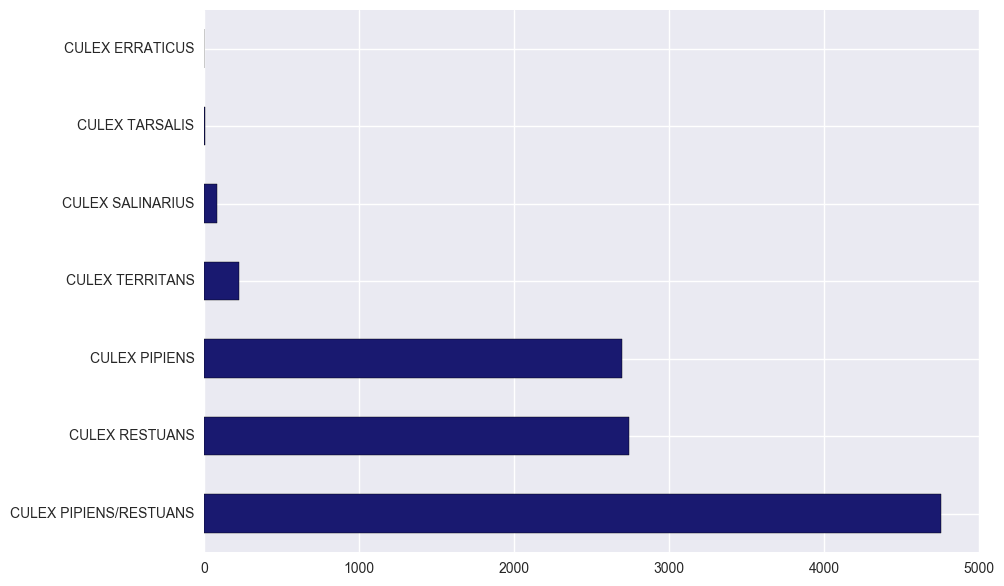

In [6]:
train.Species.value_counts().plot(kind='barh', color='midnightblue', figsize=(10,7))
plt.show()

In [7]:
pd.pivot_table(train, index=['Species'], values=['WnvPresent'], aggfunc=[np.mean,np.sum])

,mean,sum
,WnvPresent,WnvPresent
Species,,
CULEX ERRATICUS,0.000000,0
CULEX PIPIENS,0.088922,240
CULEX PIPIENS/RESTUANS,0.055135,262
CULEX RESTUANS,0.017883,49
CULEX SALINARIUS,0.000000,0
CULEX TARSALIS,0.000000,0
CULEX TERRITANS,0.000000,0


In [8]:
train.WnvPresent.value_counts()

0    9955
1     551
Name: WnvPresent, dtype: int64

In [9]:
weather = pd.read_csv('weather.csv')
weather.head(10)

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,...,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68,M,51,57,0,3,...,,M,M,M,0.00,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51,-3,42,47,14,0,...,BR,0,M,0.0,0.00,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,52,M,42,47,13,0,...,BR HZ,M,M,M,0.00,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56,2,40,48,9,0,...,,0,M,0.0,0.00,29.39,30.12,11.7,7,11.9
5,2,2007-05-03,67,48,58,M,40,50,7,0,...,HZ,M,M,M,0.00,29.46,30.12,12.9,6,13.2
6,1,2007-05-04,66,49,58,4,41,50,7,0,...,RA,0,M,0.0,T,29.31,30.05,10.4,8,10.8
7,2,2007-05-04,78,51,M,M,42,50,M,M,...,,M,M,M,0.00,29.36,30.04,10.1,7,10.4
8,1,2007-05-05,66,53,60,5,38,49,5,0,...,,0,M,0.0,T,29.40,30.10,11.7,7,12.0
9,2,2007-05-05,66,54,60,M,39,50,5,0,...,,M,M,M,T,29.46,30.09,11.2,7,11.5


In [10]:
weather.Water1.value_counts()

M    2944
Name: Water1, dtype: int64

In [11]:
weather.Depart[1::2].value_counts()

M    1472
Name: Depart, dtype: int64

In [12]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2944 entries, 0 to 2943
Data columns (total 22 columns):
Station        2944 non-null int64
Date           2944 non-null object
Tmax           2944 non-null int64
Tmin           2944 non-null int64
Tavg           2944 non-null object
Depart         2944 non-null object
DewPoint       2944 non-null int64
WetBulb        2944 non-null object
Heat           2944 non-null object
Cool           2944 non-null object
Sunrise        2944 non-null object
Sunset         2944 non-null object
CodeSum        2944 non-null object
Depth          2944 non-null object
Water1         2944 non-null object
SnowFall       2944 non-null object
PrecipTotal    2944 non-null object
StnPressure    2944 non-null object
SeaLevel       2944 non-null object
ResultSpeed    2944 non-null float64
ResultDir      2944 non-null int64
AvgSpeed       2944 non-null object
dtypes: float64(1), int64(5), object(16)
memory usage: 506.1+ KB


In [13]:
train['year'] = train.Date.apply(lambda x:x.year)
train['month'] = train.Date.apply(lambda x:x.month)

In [14]:
test = pd.read_csv('test.csv')
len(test.Trap.value_counts())

149

In [15]:
def get_zipcode(address):
    import re
    try:
        return re.search('(\d+),',address).group(1)
    except:
        return 'No_zip'
train['Zip'] = train.Address.apply(get_zipcode)


In [15]:
stn1_lat = 41.995
stn1_long = -87.933
stn2_lat = 41.786
stn2_long = -87.752
stn_df = pd.DataFrame({'x':[stn1_lat, stn2_lat],'y':[stn1_long,stn2_long],'label':[1,2]})

In [16]:
stn_df

,label,x,y
0,1,41.995,-87.933
1,2,41.786,-87.752


In [17]:
loc_train_X = stn_df.drop('label',axis=1)
loc_train_y = stn_df.label
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors = 1)
model = clf.fit(loc_train_X,loc_train_y)
pred = model.predict(train[['Latitude','Longitude']]) 

In [18]:
train['Station'] = pred

In [19]:
test_pred = model.predict(test[['Latitude','Longitude']])
test['Station'] = test_pred
test.Date = pd.to_datetime(test.Date)
test['year'] = test.Date.apply(lambda x:x.year)
test['month'] = test.Date.apply(lambda x:x.month)

In [20]:
weather.Date = pd.to_datetime(weather.Date)

In [21]:
join_train = train.merge(weather, on = ['Date','Station'], how='inner')
join_test = test.merge(weather, on = ['Date','Station'], how='inner')

In [23]:
#join_train.info()

In [22]:
join_train.AvgSpeed = join_train.AvgSpeed.astype(float)

In [23]:
for col in join_train.columns.tolist():
    try:
        join_train[col] = join_train[col].astype(float)
        join_test[col] = join_test[col].astype(float)
    except:
        pass

In [24]:
join_train_init = join_train.copy()
join_test_init = join_test.copy()
for col in join_train:
    if join_train[col].dtype == 'object':
        join_train_init.drop(col,axis=1, inplace=True)
for col in join_test:
    if join_test[col].dtype == 'object':
        join_test_init.drop(col,axis=1, inplace=True)
#join_train_init.info()

In [25]:
print join_train.shape
print join_train_init.shape
print join_test.shape
print join_test_init.shape

(10506, 35)
(10506, 20)
(116293, 34)
(116293, 19)


In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score
X_train = join_train_init.drop(['WnvPresent','Date','NumMosquitos'],axis=1)
y = join_train_init['WnvPresent']
X_test = join_test_init.drop(['Id','Date'],axis=1)
clf_log= LogisticRegression()
model_log = clf_log.fit(X_train,y)
pred_log = model_log.predict(X_train)
clf_knn= KNeighborsClassifier(n_neighbors=1)
model_knn = clf_knn.fit(X_train,y)
pred_knn = model_knn.predict(X_train)
print 'Logreg acc',accuracy_score(y,pred_log)
print 'Logreg auc',roc_auc_score(y,pred_log)
print 'knn acc',accuracy_score(y,pred_knn)
print 'knn auc',roc_auc_score(y,pred_knn)


Logreg acc 0.947553778793
Logreg auc 0.5
knn acc 0.941271654293
knn auc 0.733276422668


In [27]:
init_pred_knn = model_knn.predict(X_test)

In [30]:
submission = pd.DataFrame({'Id':test.Id,'WnvPresent':init_pred_knn})
submission.to_csv('init_sub.csv',index=False)

In [31]:
from sklearn.ensemble import ExtraTreesClassifier
clf_et = ExtraTreesClassifier()
model_et = clf_et.fit(X_train,y)
pred_et = model_et.predict(X_test)
submission = pd.DataFrame({'Id':test.Id,'WnvPresent':pred_et})
submission.to_csv('init_sub_et.csv',index=False)

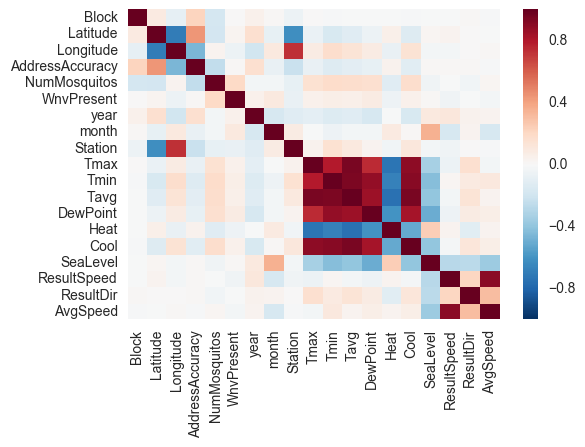

In [28]:
sns.heatmap(join_train_init.corr())

In [ ]:
spray = pd.read_csv('spray.csv')
spray.head(2)

In [34]:
spray.columns = [u'Date', u'Time', u'S_Latitude', u'S_Longitude']
spray.Date = pd.to_datetime(spray.Date)

In [35]:
j_w_s = join_train_init.merge(spray, on='Date',how='inner')

In [36]:
join_test_init.merge(spray, on='Date',how='inner')

,Id,Date,Block,Latitude,Longitude,AddressAccuracy,Station,year,month,Tmax,...,DewPoint,Heat,Cool,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,Time,S_Latitude,S_Longitude


In [37]:
np.unique(join_train_init.Date.apply(lambda x:x.year))

array([2007, 2009, 2011, 2013])

In [38]:
np.unique(join_test_init.Date.apply(lambda x:x.year))

array([2008, 2010, 2012, 2014])

In [39]:
np.unique(spray.Date.apply(lambda x:x.year))

array([2011, 2013])

In [40]:
pd.pivot_table(spray, index=['Date'], values=['Time'], aggfunc='count')

,Time
Date,
2011-08-29,95
2011-09-07,1530
2013-07-17,2202
2013-07-25,1607
2013-08-08,1195
2013-08-15,2668
2013-08-16,141
2013-08-22,1587
2013-08-29,2302


In [41]:
spray.shape

(14835, 4)

In [42]:
spray.Date.value_counts()

2013-08-15    2668
2013-08-29    2302
2013-07-17    2202
2011-09-07    2114
2013-07-25    1607
2013-08-22    1587
2013-08-08    1195
2013-09-05     924
2013-08-16     141
2011-08-29      95
Name: Date, dtype: int64

In [43]:
xxx = join_train_init[['Latitude','Longitude','year','month','Tavg','DewPoint','Heat']]
txxx = join_test_init[['Latitude','Longitude','year','month','Tavg','DewPoint','Heat']]

In [44]:
from sklearn.preprocessing import StandardScaler
from sklearn.grid_search import GridSearchCV
#scaler = StandardScaler().fit(xxx)
scaler_2 = StandardScaler().fit(join_train_init.drop(['Date','WnvPresent','NumMosquitos'],axis=1))
std_X = scaler_2.transform(join_train_init.drop(['Date','WnvPresent','NumMosquitos'],axis=1))
std_Xt = scaler_2.transform(join_test_init.drop(['Date','Id'],axis=1))
#params = {'n_neighbors':[1,2,3,4,5]}
#clf_knn= KNeighborsClassifier()
#clf = GridSearchCV(clf_knn, params, cv=5, scoring='roc_auc')
#model = clf.fit(std_xxx,y)
#print model.best_score_
#print model.best_params_




#model_knn = clf_knn.fit(xxx,y)
#pred_knn = model_knn.predict(xxx)
#print 'knn acc',accuracy_score(y,pred_knn)
#print 'knn auc',roc_auc_score(y,pred_knn)

//anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
//anaconda/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [45]:
#a = model.best_estimator_.fit(std_xxx,y)
#preda = a.predict(std_txxx)

In [ ]:
submission = pd.DataFrame({'Id':test.Id,'WnvPresent':preda})
submission.to_csv('std_fs_knn.csv',index=False)

In [ ]:
#predb = a.predict(std_xxx)
#print accuracy_score(y, predb)
#print roc_auc_score(y, predb)

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
#params = {'n_estimators':[1,2,3,4,5]}
#clf_rf= RandomForestClassifier(n_estimators=1000)
#clf = GridSearchCV(clf_rf, params, cv=5, scoring='roc_auc')
#model = clf_rf.fit(std_xxx,y)
#print model.best_score_
#print model.best_params_
#pred = model.predict(std_xxx)
#print accuracy_score(y,pred)
#print roc_auc_score(y,pred)

In [47]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(clf,std_xxx,y,cv=10, n_jobs=2, scoring='roc_auc')
print np.mean(score)
print score

NameError: name 'std_xxx' is not defined

In [48]:
clf_gb = GradientBoostingClassifier()
score = cross_val_score(clf_gb,std_xxx2,y,cv=10,n_jobs=2,scoring='roc_auc')
print np.mean(score)
print score

NameError: name 'GradientBoostingClassifier' is not defined

In [49]:
clf_ab = AdaBoostClassifier(n_estimators=10)
score = cross_val_score(clf_ab,std_xxx2,y,cv=10,scoring='roc_auc',n_jobs=2)
print np.mean(score)
print score

NameError: name 'AdaBoostClassifier' is not defined

In [50]:
x_train, x_val, y_train, y_test = train_test_split(std_xxx,y,test_size=0.2,random_state=42)
knn = KNeighborsClassifier(n_neighbors=1)
score = cross_val_score(knn,x_train,y_train,cv=5)
model = knn.fit(x_train,y_train)
pred = model.predict(x_val)
print classification_report(y_test,pred)
print confusion_matrix(y_test,pred)
print roc_auc_score(y_test,pred)
print score
print np.mean(score)

NameError: name 'train_test_split' is not defined

In [51]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
params = {'n_estimators':[50,100,500,1000]}
clf_ab = AdaBoostClassifier()
clf = GridSearchCV(clf_ab, params, cv=10, scoring='roc_auc')
model = clf.fit(std_xxx,y)
print model.best_score_
print model.best_params_
#pred = model.predict(std_xxx)
#print accuracy_score(y,pred)
#print roc_auc_score(y,pred)

NameError: name 'std_xxx' is not defined

In [52]:
abmodel = model.best_estimator_.fit(std_xxx2,y)
predab = abmodel.predict(std_txxx2)
cr = abmodel.predict(std_xxx2)
#from sklearn.metrics import classification_report, confusion_matrix
print classification_report(y,cr)
print confusion_matrix(y,cr)

AttributeError: 'KNeighborsClassifier' object has no attribute 'best_estimator_'

In [53]:
model.best_estimator_

AttributeError: 'KNeighborsClassifier' object has no attribute 'best_estimator_'

In [54]:
xxx2 = join_train_init[['Latitude','Longitude','year','month','Tavg','DewPoint','Heat','AddressAccuracy','Cool']]
txxx2 = join_test_init[['Latitude','Longitude','year','month','Tavg','DewPoint','Heat','AddressAccuracy','Cool']]

In [55]:
scaler = StandardScaler().fit(xxx2)
std_xxx2 = scaler.transform(xxx2)
std_txxx2 = scaler.transform(txxx2)
clf_ab = AdaBoostClassifier()
from sklearn.model_selection import cross_val_score
score = cross_val_score(clf_ab,std_xxx2,y,cv=10,scoring='roc_auc')
print np.mean(score)
print score

0.576293916366
[ 0.53014738  0.31217598  0.4437751   0.78615371  0.90279299  0.42984011
  0.82267702  0.35788031  0.6920603   0.48543627]


In [56]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
ldatf = LDA().fit_transform(std_xxx,y)
score = cross_val_score(LDA(),ldatf,y,cv=10,scoring='roc_auc')
print np.mean(score)
print score


NameError: name 'std_xxx' is not defined

In [57]:
ldamodel = LDA().fit(ldatf,y)
#predlda = ldamodel.predict(ldatf)
cr = ldamodel.predict(ldatf)
#from sklearn.metrics import classification_report, confusion_matrix
print classification_report(y,cr)
print confusion_matrix(y,cr)

NameError: name 'ldatf' is not defined

In [58]:
ldatf = LDA().fit_transform(std_xxx,y)

NameError: name 'std_xxx' is not defined

In [59]:
clf_knn = KNeighborsClassifier(n_neighbors=1)
model = clf_knn.fit(std_xxx,y)
pred = model.predict(std_xxx)
print classification_report(y_test,pred)
print confusion_matrix(y_test,pred)
print roc_auc_score(y_test,pred)
print score
print np.mean(score)

NameError: name 'std_xxx' is not defined

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
pca = PCA().fit(std_X)
pca_x_train = pca.transform(std_X)
pca_x_test = pca.transform(std_Xt)
pcax_train, pcax_val, y_train, y_test = train_test_split(pca_x_train,y,test_size=0.2,random_state=42)

In [61]:
np.cumsum(pca.explained_variance_ratio_)

array([ 0.31716634,  0.47588697,  0.60690534,  0.67239959,  0.73578243,
        0.79303425,  0.84324926,  0.88478031,  0.91753873,  0.94137723,
        0.96156754,  0.97646546,  0.98942463,  0.99541259,  0.99993518,
        1.        ,  1.        ])

In [62]:
xy = pcax_train[:,:6]
yy = pcax_val[:,:6]
knn = KNeighborsClassifier(n_neighbors=1)
score = cross_val_score(knn,xy,y_train,cv=5)
model = knn.fit(xy,y_train)
pred = model.predict(yy)
print classification_report(y_test,pred)
print confusion_matrix(y_test,pred)
print roc_auc_score(y_test,pred)
print score
print np.mean(score)

NameError: name 'classification_report' is not defined

In [63]:
clf = AdaBoostClassifier(n_estimators=1000)
score = cross_val_score(clf,xy,y_train,cv=10)
model = clf.fit(xy,y_train)
pred = model.predict(yy)
print classification_report(y_test,pred)
print confusion_matrix(y_test,pred)
print roc_auc_score(y_test,pred)
print score
print np.mean(score)

KeyboardInterrupt: 

In [64]:
model = knn.fit(pca_x_train[:,:6],y)
pred = model.predict(pca_x_test[:,:6])

In [65]:
submission = pd.DataFrame({'Id':test.Id,'WnvPresent':pred})
submission.to_csv('std_pca_knn.csv',index=False)

In [66]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.svm import SVC
xy = pcax_train[:,:6]
yy = pcax_val[:,:6]
clf = SVC()
model = clf.fit(xy,y_train)
pred = model.predict(yy)
print classification_report(y_test,pred)
print confusion_matrix(y_test,pred)
print roc_auc_score(y_test,pred)
print score
print np.mean(score)

             precision    recall  f1-score   support

        0.0       0.95      1.00      0.97      1988
        1.0       0.00      0.00      0.00       114

avg / total       0.89      0.95      0.92      2102

[[1988    0]
 [ 114    0]]
0.5
[ 0.91914388  0.90665874  0.91071429  0.9077381   0.92083333]
0.913017666044


//anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [67]:
from sklearn import feature_selection

In [74]:
std_X[:,[1,9,2]]

array([[ 1.00722527,  0.0956264 , -1.04738847],
       [ 1.00722527,  0.0956264 , -1.04738847],
       [ 1.36470596,  0.0956264 , -0.71879931],
       ..., 
       [ 1.29630732, -1.10658859,  0.35065933],
       [ 0.63354748, -1.10658859,  0.33004998],
       [-0.57400651, -1.10658859,  0.75445346]])

In [75]:
std_X.shape

(10506, 17)

In [81]:
np.random.choice(std_X.shape[1],5,replace=False)

array([ 3, 15,  0,  4,  9])

In [88]:
join_test_init = join_test_init[join_train_init.drop(['Date','WnvPresent','NumMosquitos'],axis=1).columns.tolist()]

In [89]:
join_test_init.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116293 entries, 0 to 116292
Data columns (total 17 columns):
Block              116293 non-null float64
Latitude           116293 non-null float64
Longitude          116293 non-null float64
AddressAccuracy    116293 non-null float64
year               116293 non-null float64
month              116293 non-null float64
Station            116293 non-null float64
Tmax               116293 non-null float64
Tmin               116293 non-null float64
Tavg               116293 non-null float64
DewPoint           116293 non-null float64
Heat               116293 non-null float64
Cool               116293 non-null float64
SeaLevel           116293 non-null float64
ResultSpeed        116293 non-null float64
ResultDir          116293 non-null float64
AvgSpeed           116293 non-null float64
dtypes: float64(17)
memory usage: 16.0 MB


In [91]:
scaler_2 = StandardScaler().fit(join_train_init.drop(['Date','WnvPresent','NumMosquitos'],axis=1))
std_X = scaler_2.transform(join_train_init.drop(['Date','WnvPresent','NumMosquitos'],axis=1))
std_Xt = scaler_2.transform(join_test_init)

In [99]:
pred_lst = []
for i in range(500):
    cols = np.random.choice(std_X.shape[1],5,replace=False)
    model = knn.fit(std_X[:,cols],y)
    pred = model.predict(std_Xt[:,cols])
    pred_lst.append(pred)
fin_pred = np.median(pred_lst, axis=0)

In [100]:
fin_pred.shape

(116293,)

In [101]:
submission = pd.DataFrame({'Id':test.Id,'WnvPresent':fin_pred})
submission.to_csv('ens_knn.csv',index=False)